# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as rq
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
record_count = 0
set_count = 1

print('Beginning Data Retrieval')     
print('-----------------------------')

cities_weather = []

for city in cities:
    record_count+=1

    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    if(record_count==50):
        set_count+=1
        record_count=0
    url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
    try:
        response = rq.get(url).json()
        cities_weather.append({'City':city,
                               'Lat':response['coord']['lat'],
                               'Lon':response['coord']['lon'],
                               'Temp':response['main']['temp'],
                               'Humidity':response['main']['humidity'],
                               'Wind':response['wind']['speed'],
                               'Cloudiness':response['clouds']['all'],
                               'Date':response['dt']})
    except:
        print('City not found. Skipping...')
        pass
print('-----------------------------')
print('Data Retrieval Complete')      
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | saint-philippe
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | vila franca do campo
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | kibray
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | peterhead
Processing Record 9 of Set 1 | matara
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 16 of Set 1 | kroya
Processing Record 17 of Set 1 | avera
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | souillac
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | hobart
Proces

Processing Record 39 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 40 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 41 of Set 4 | paoua
Processing Record 42 of Set 4 | zhigansk
Processing Record 43 of Set 4 | mozarlandia
Processing Record 44 of Set 4 | jiuquan
Processing Record 45 of Set 4 | somerset
Processing Record 46 of Set 4 | merauke
Processing Record 47 of Set 4 | nunoa
Processing Record 48 of Set 4 | sines
Processing Record 49 of Set 4 | fairbanks
Processing Record 50 of Set 4 | havre-saint-pierre
Processing Record 1 of Set 5 | portland
Processing Record 2 of Set 5 | goderich
Processing Record 3 of Set 5 | victoria
Processing Record 4 of Set 5 | meulaboh
Processing Record 5 of Set 5 | belyy yar
Processing Record 6 of Set 5 | broome
Processing Record 7 of Set 5 | kotma
Processing Record 8 of Set 5 | eyl
Processing Record 9 of Set 5 | flin flon
Processing Record 10 of Set 5 | buala
Processing Record 11 of Set 5 | walvis bay
Processing R

Processing Record 30 of Set 8 | algiers
Processing Record 31 of Set 8 | ouargaye
Processing Record 32 of Set 8 | marfino
Processing Record 33 of Set 8 | meyungs
City not found. Skipping...
Processing Record 34 of Set 8 | tautira
Processing Record 35 of Set 8 | pozo colorado
Processing Record 36 of Set 8 | cam pha
City not found. Skipping...
Processing Record 37 of Set 8 | tabuk
Processing Record 38 of Set 8 | vardo
Processing Record 39 of Set 8 | champerico
Processing Record 40 of Set 8 | elat
Processing Record 41 of Set 8 | rio grande
Processing Record 42 of Set 8 | yeniseysk
Processing Record 43 of Set 8 | robertson
Processing Record 44 of Set 8 | xichang
Processing Record 45 of Set 8 | camacari
Processing Record 46 of Set 8 | yanan
City not found. Skipping...
Processing Record 47 of Set 8 | la oroya
Processing Record 48 of Set 8 | shaunavon
Processing Record 49 of Set 8 | santa maria
Processing Record 50 of Set 8 | isla mujeres
Processing Record 1 of Set 9 | novyy urengoy
Processing

Processing Record 18 of Set 12 | sitka
Processing Record 19 of Set 12 | kissidougou
Processing Record 20 of Set 12 | escanaba
Processing Record 21 of Set 12 | prainha
Processing Record 22 of Set 12 | burica
City not found. Skipping...
Processing Record 23 of Set 12 | nicoya
Processing Record 24 of Set 12 | metro
Processing Record 25 of Set 12 | bamako
Processing Record 26 of Set 12 | mehran
Processing Record 27 of Set 12 | kabare
Processing Record 28 of Set 12 | presidencia roque saenz pena
Processing Record 29 of Set 12 | pleasanton
Processing Record 30 of Set 12 | yurginskoye
Processing Record 31 of Set 12 | mitu
Processing Record 32 of Set 12 | tostamaa
City not found. Skipping...
Processing Record 33 of Set 12 | vidalia
Processing Record 34 of Set 12 | nanyamba
Processing Record 35 of Set 12 | esmeraldas
Processing Record 36 of Set 12 | kieta
Processing Record 37 of Set 12 | wajima
Processing Record 38 of Set 12 | tuljapur
Processing Record 39 of Set 12 | la primavera
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [39]:
#create DF
weather_df = pd.DataFrame(cities_weather)
weather_df.head()

,City,Lat,Lon,Temp,Humidity,Wind,Cloudiness,Date
0,saint-philippe,-21.36,55.77,62.40,77,5.82,40,1595792345
1,yellowknife,62.46,-114.35,71.29,40,9.17,20,1595792422
2,vila franca do campo,37.72,-25.43,73.40,78,10.29,40,1595792375
3,mar del plata,-38.00,-57.56,51.94,66,14.99,100,1595791992
4,busselton,-33.65,115.33,61.29,93,3.00,49,1595792587


In [42]:
#send to CSV
weather_df.to_csv("cities.csv")

In [43]:
weather_df.count()

City          570
Lat           570
Lon           570
Temp          570
Humidity      570
Wind          570
Cloudiness    570
Date          570
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [44]:
#  Get the indices of cities that have humidity over 100%.
old_data = weather_df.loc[weather_df['Humidity'] > 100].index

In [45]:
clean_data_df = weather_df.drop(old_data, inplace=False)

In [46]:
# Export the City_Data into a csv
clean_data_df.to_csv("clean_cities.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

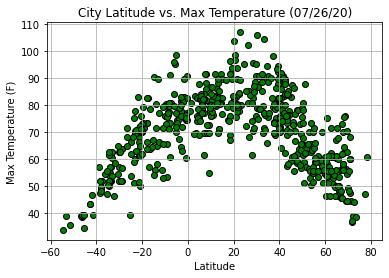

In [47]:
#plot a scatter plot with lat vs temp
plt.scatter(clean_data_df['Lat'], clean_data_df['Temp'], edgecolors='black',facecolors='green')
plt.title('City Latitude vs. Max Temperature (07/26/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig('Lat_vs_Temp.png')
plt.show()

#In this plot you can see the temperature rise as you the latitude comes closer to 0 and then going back down as it goes up.

## Latitude vs. Humidity Plot

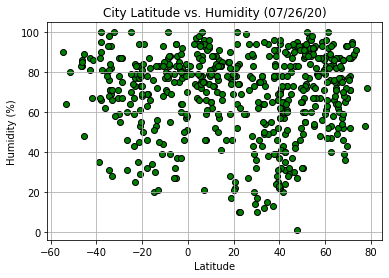

In [48]:
#plot scatter lat vs humd
plt.scatter(clean_data_df['Lat'], clean_data_df['Humidity'], edgecolors='black',facecolors='green')
plt.title('City Latitude vs. Humidity (07/26/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('Lat_vs_Humd.png')
plt.show()

#In this plot it seems to be very random on huimidity based latitude and there seems to be a much higher humidity across the board.

## Latitude vs. Cloudiness Plot

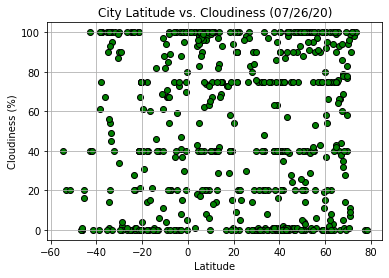

In [49]:
plt.scatter(clean_data_df['Lat'], clean_data_df['Cloudiness'], edgecolors='black',facecolors='green')
plt.title('City Latitude vs. Cloudiness (07/26/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('Lat_vs_cloud.png')
plt.show()

#There seems to be a either 100% or 0% of cloudiness and less of cloudiness in between.

## Latitude vs. Wind Speed Plot

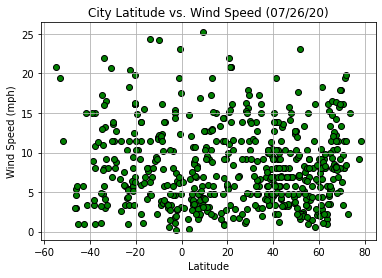

In [50]:
plt.scatter(clean_data_df['Lat'], clean_data_df['Wind'], edgecolors='black',facecolors='green')
plt.title('City Latitude vs. Wind Speed (07/26/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig('Lat_vs_wind.png')
plt.show()

#The wind speed seems to be random as well based on latitude and this may just be based on time of day in each place.

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [59]:
# Create Northern and Southern Hemisphere DataFrames
north_hem_df = clean_data_df.loc[clean_data_df['Lat']>=0.0]


south_hem_df = clean_data_df.loc[clean_data_df['Lat']<0.0]

north_hem_df

,City,Lat,Lon,Temp,Humidity,Wind,Cloudiness,Date
1,yellowknife,62.46,-114.35,71.29,40,9.17,20,1595792422
2,vila franca do campo,37.72,-25.43,73.40,78,10.29,40,1595792375
5,kibray,41.39,69.46,87.80,20,13.87,35,1595792587
7,peterhead,57.51,-1.80,58.86,48,8.05,43,1595792588
8,matara,5.95,80.54,78.37,88,7.00,100,1595791994
...,...,...,...,...,...,...,...,...
563,namie,37.48,141.00,69.64,96,3.94,100,1595792767
565,makaha,21.47,-158.22,79.88,94,13.87,90,1595792768
567,manzhouli,49.60,117.43,65.43,65,3.80,0,1595792768
568,muros,42.78,-9.06,76.03,64,8.05,0,1595792390


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

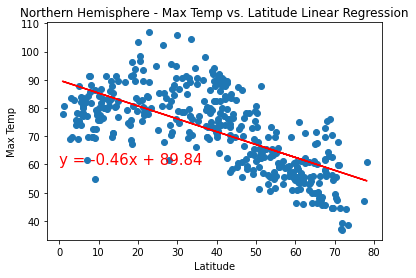

<Figure size 432x288 with 0 Axes>

In [89]:
from scipy.stats import linregress
x_values = north_hem_df['Lat']
y_values = north_hem_df['Temp']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()
plt.savefig('North_Hem_MaxTemp_vs_Latitude_Linear.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

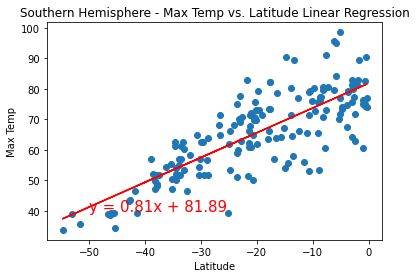

<Figure size 432x288 with 0 Axes>

In [88]:
x_values = south_hem_df['Lat']
y_values = south_hem_df['Temp']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()
plt.savefig('South_Hem_MaxTemp_vs_Latitude_Linear.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

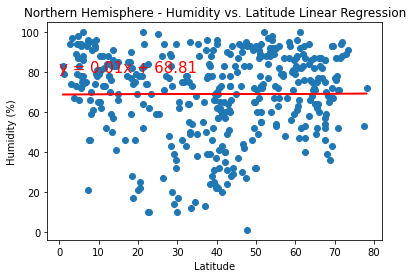

<Figure size 432x288 with 0 Axes>

In [90]:
x_values = north_hem_df['Lat']
y_values = north_hem_df['Humidity']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.show()
plt.savefig('North_Hem_Humidity_vs_Latitude_Linear.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

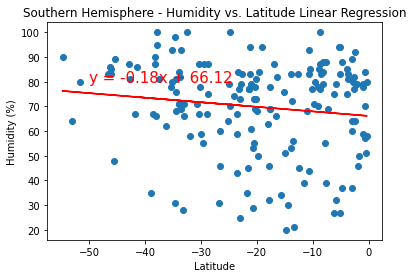

<Figure size 432x288 with 0 Axes>

In [91]:
x_values = south_hem_df['Lat']
y_values = south_hem_df['Humidity']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.show()
plt.savefig('South_Hem_Humidity_vs_Latitude_Linear.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

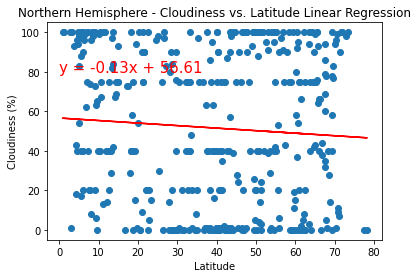

<Figure size 432x288 with 0 Axes>

In [92]:
x_values = north_hem_df['Lat']
y_values = north_hem_df['Cloudiness']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.show()
plt.savefig('North_Hem_Cloudiness_vs_Latitude_Linear.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

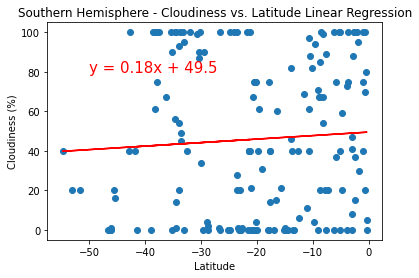

<Figure size 432x288 with 0 Axes>

In [93]:
x_values = south_hem_df['Lat']
y_values = south_hem_df['Cloudiness']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.show()
plt.savefig('South_Hem_Cloudiness_vs_Latitude_Linear.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

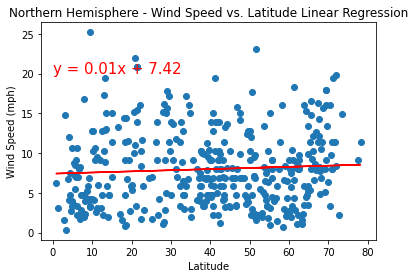

<Figure size 432x288 with 0 Axes>

In [102]:
x_values = north_hem_df['Lat']
y_values = north_hem_df['Wind']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.show()
plt.savefig('North_Hem_wind_vs_Latitude_Linear.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

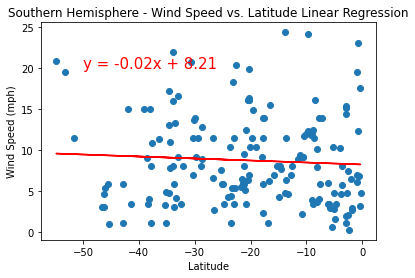

<Figure size 432x288 with 0 Axes>

In [100]:
x_values = south_hem_df['Lat']
y_values = south_hem_df['Wind']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.show()
plt.savefig('South_Hem_wind_vs_Latitude_Linear.png')

In [ ]:
#For Part I, you must include a written description of three observable trends based on the data.

#1.) Based on the random cities selected it is clear that as the latitude moves close to 0 the temp goes up.

#2.) The random cities selected have a very wide range of wind speed, and cloudiness and that could be based on the time of day the code ran. 

#3.) The Humidity seems to be very high in majority of the cities selected and also, out of 570 cities selected 400 of them were on the northen hempisphere.